In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from simple_colors import *
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import load_boston
 
import warnings
warnings.filterwarnings("ignore")  

import sklearn.metrics as metrics
from sklearn.metrics  import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from pprint import pprint
 

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
bos.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [4]:
## In the above dataset, columns are given the range from 0 to 12 and we are not able to understand the features 
# So, lets assign fature names from the original Boston Dataset
bos.columns = boston.feature_names
bos.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [5]:
# Also, we can see that Price column is missing, so let's add our Price column as well
bos['PRICE'] = boston.target

In [6]:
bos.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [7]:
print(black('Shape of the data is: ',['bold']))
print(bos.shape)
print("*************************************************\n")

print(green('Data type of the columns :\n ',['bold']))
print(bos.dtypes)
print("*************************************************\n")


print(red('Unique values in the data :\n  ',['bold']))
print(bos.nunique())
print("*************************************************\n")
 
print(blue('Check for missing values :\n  ',['bold']))
print(bos.isnull().sum())
print("*************************************************\n")


Shape of the data is: 
(506, 14)
*************************************************

Data type of the columns :
 
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object
*************************************************

Unique values in the data :
  
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64
*************************************************

Check for missing values :
  
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64
**************************

##### Few Observations from above code-
1. There are 504 rows and 14 columns in this boston dataset
2. All the columns have the same data type, which is float64
3. There are no mising values in this dataset.

### Exploratory Data Analysis 

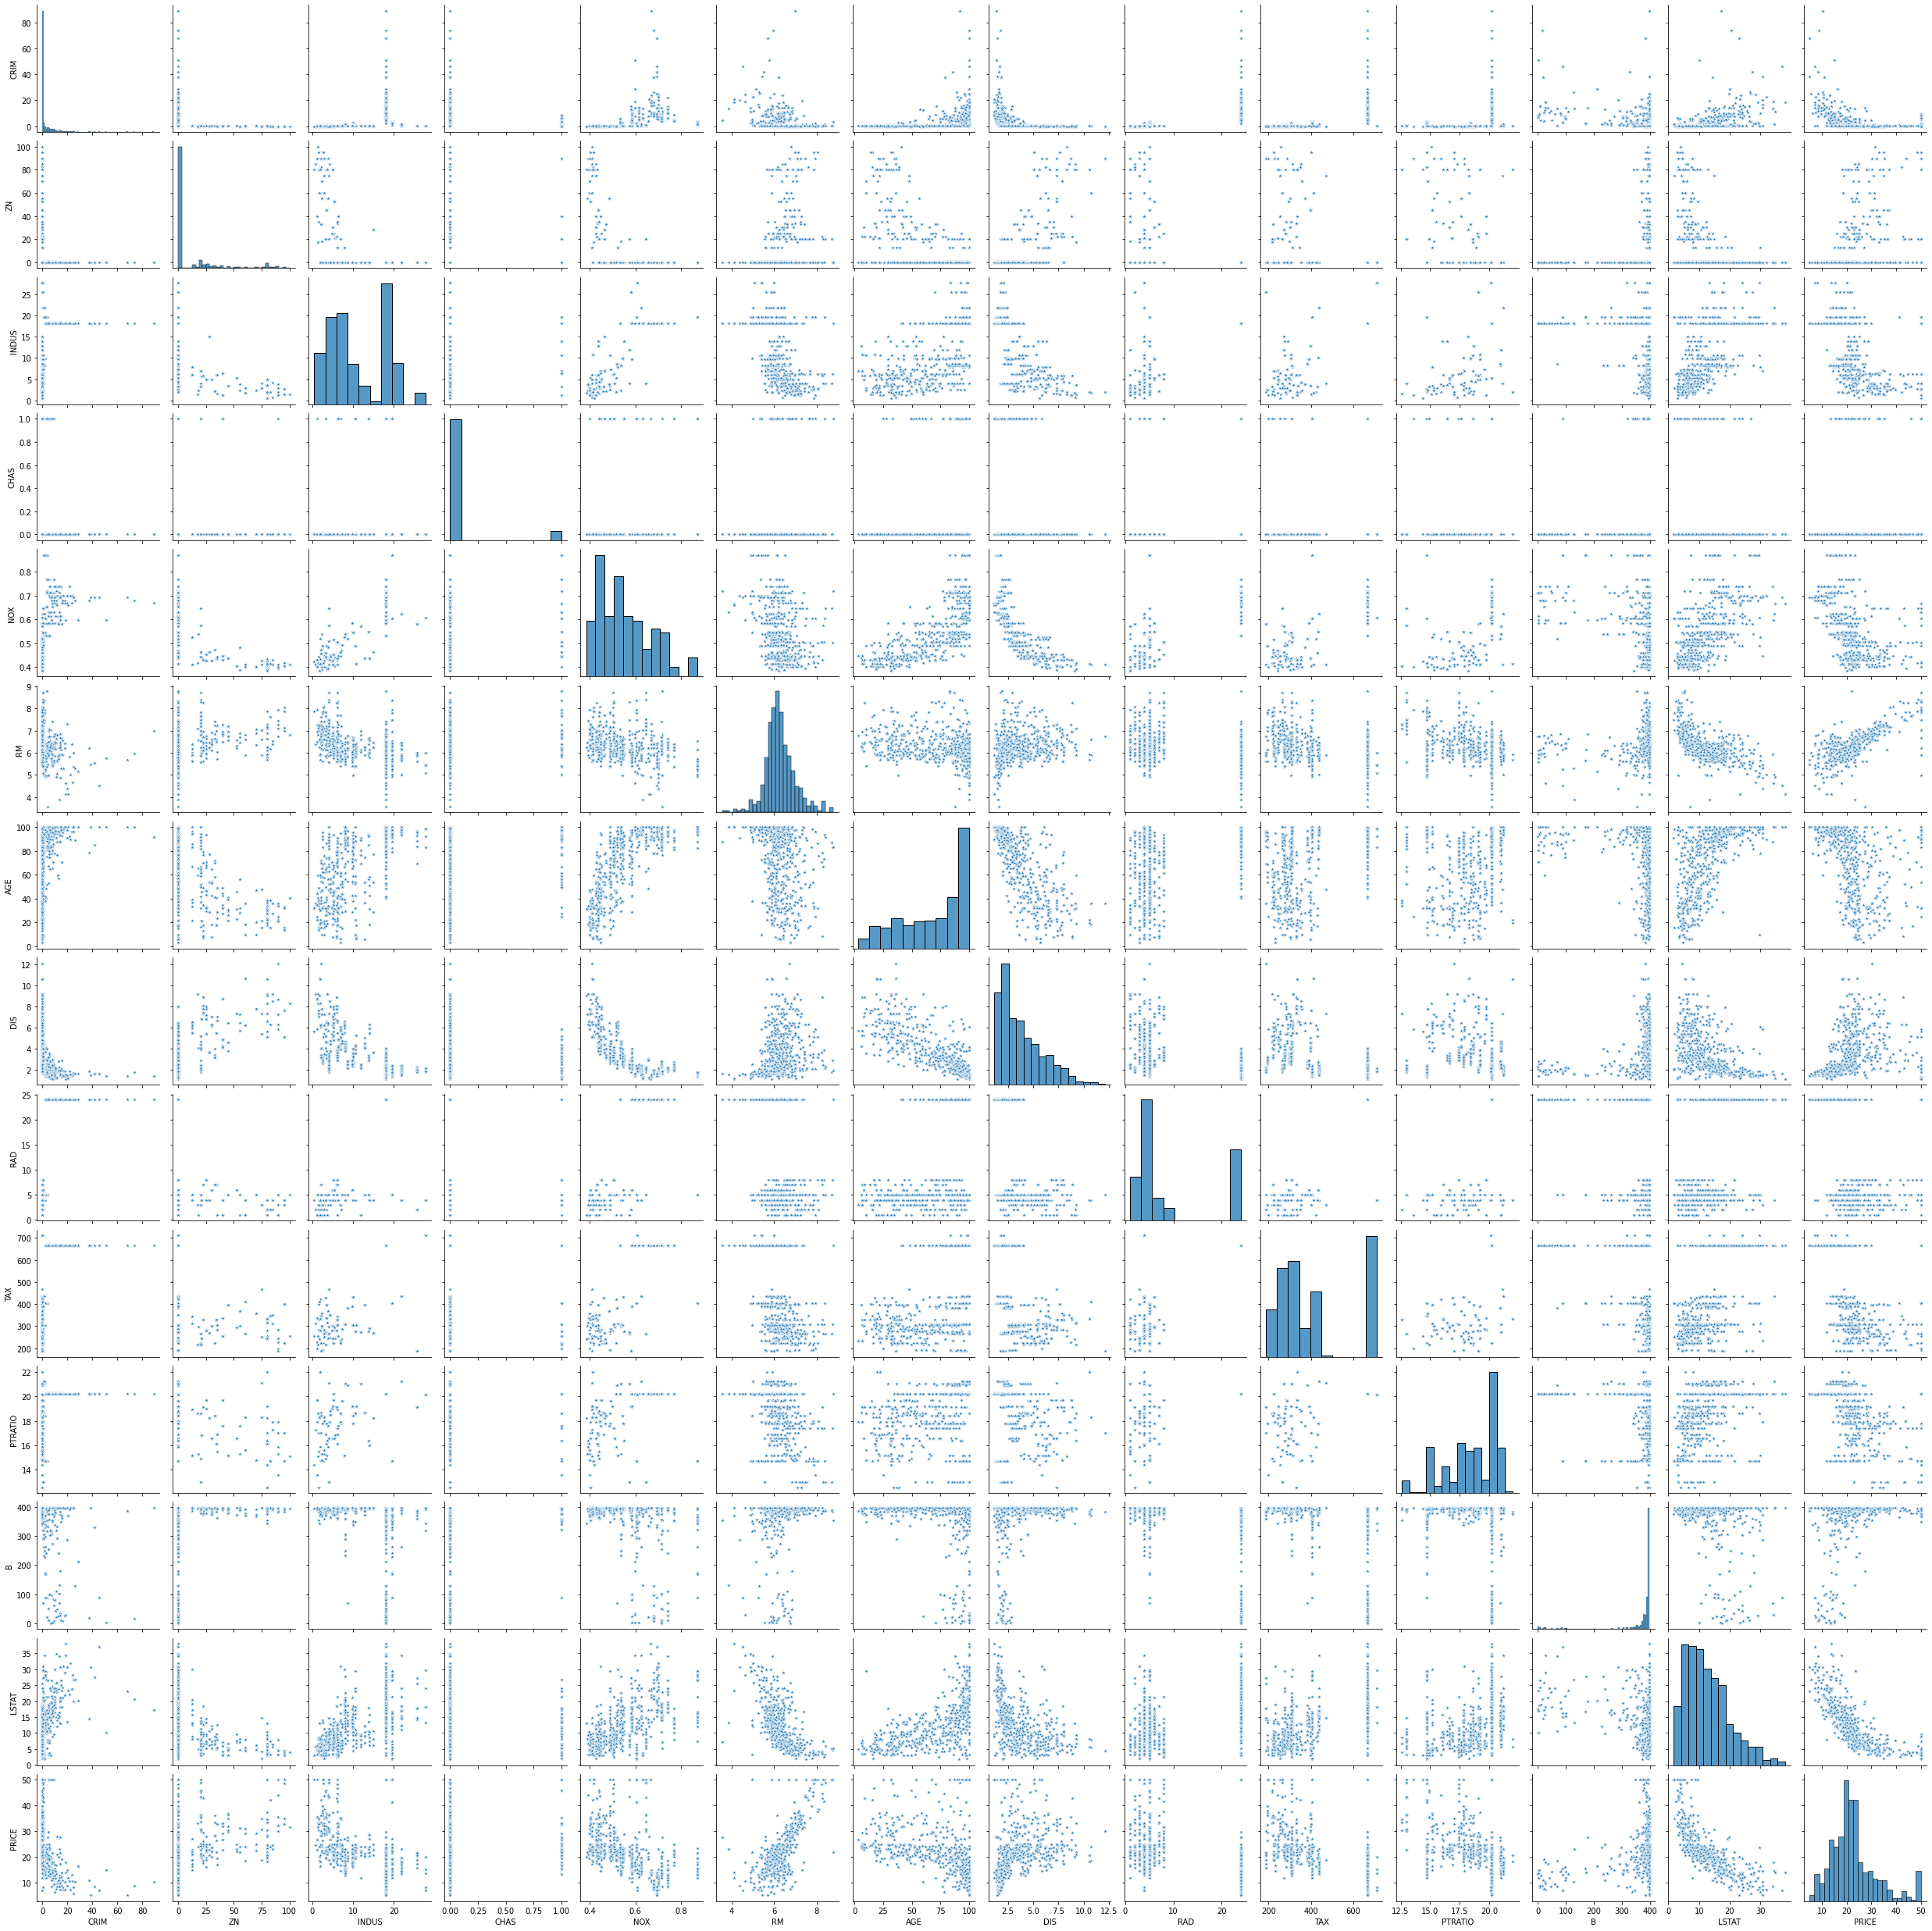

In [8]:
sns.pairplot(bos,kind = 'scatter',markers="*",palette='viridis')
plt.show()

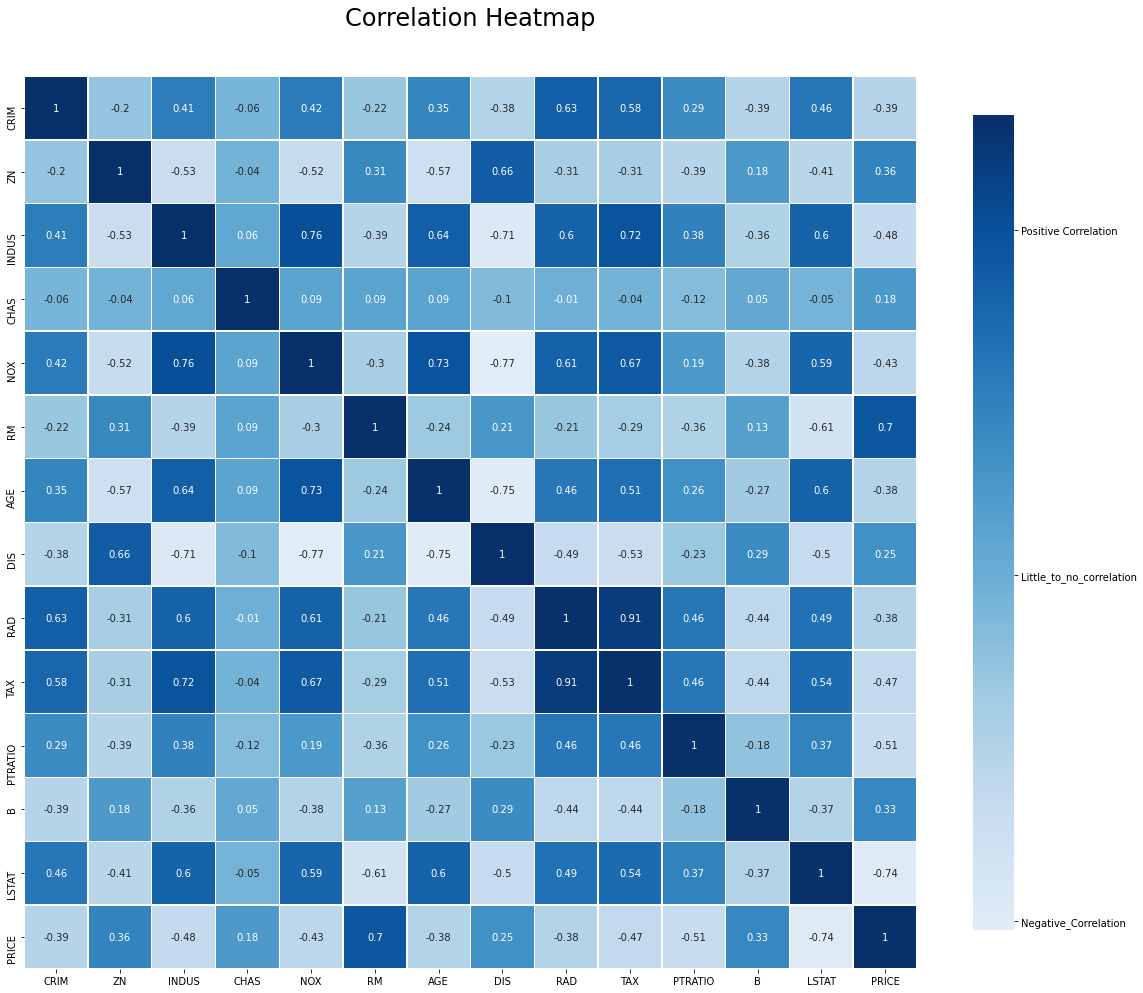

In [9]:
mask = np.triu(np.ones_like(bos.corr()))
f,ax = plt.subplots(figsize=(20,20))
cmap= sns.color_palette("Blues",as_cmap=True)
sns.heatmap(bos.corr().round(2),annot=True,cmap=cmap,vmax=1.0,center=0,square=True,lw=0.5,cbar_kws={"shrink":0.75})
ax.set_title('Correlation Heatmap', fontsize=24, y=1.05)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.75,0,0.75])
colorbar.set_ticklabels(['Negative_Correlation','Little_to_no_correlation','Positive Correlation'])

##### Few observations from the above Heatmap - 

1. Room No. has a high positive correlation with Price, i.e Mean Price is 0.7
The more the value of no. of rooms, the more will be the value of 'Mean_Price'. 
Because it's pretty evident that with increase in the number of rooms, the price of the house will increase.

2. Pupil Teacher ratio has negative mean value i.e.-0.51. As Pupil Teacher ratio increases, the price of the house will decrease.

3. NOX and Distance are highly correlated, So there exists multicollinearity. 

4. CHAS feature has very less mean value, so if we include that in our feature selection,it will not give us much information to predict the price of the House. we have to drop one of these columns to increase the accuracy of the model.(This will automatically reduce the complexity as well)

5. LSTAT(-0.74), Tax(-0.47) and Rad(-0.38) has negative correlation with the price

6. AGE and DIS are negatively correlated with each other

7. TAX and RAD are positively correlated with each other  This means, with significant increase in TAx, Radial highways will also increase.


In [10]:
#We will consider features- RM , TAX, PTRATIO, LSTAT and PRICE .
# Let's create a new dataframe with above columns
new_df = bos[['RM','TAX','PTRATIO','LSTAT','PRICE']]
new_df.head().style.background_gradient()


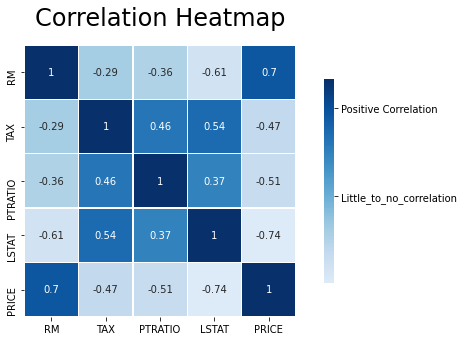

In [11]:
# Let's check heatmap withfor our new dataframe
mask = np.triu(np.ones_like(new_df.corr()))
f,ax = plt.subplots(figsize=(10,5))
cmap= sns.color_palette("Blues",as_cmap=True)
sns.heatmap(new_df.corr().round(2),annot=True,cmap=cmap,vmax=1.0,center=0,square=True,lw=0.5,cbar_kws={"shrink":0.75})
ax.set_title('Correlation Heatmap', fontsize=24, y=1.05)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-0.75,0,0.75])
colorbar.set_ticklabels(['Negative_Correlation','Little_to_no_correlation','Positive Correlation'])

#### Few observations from the above heatmap - 
1. LSTAT,PTRATIO and TAX are negatively correlated with PRIC
2. RM is positively correlated with PRICE.
3. TAX and LSTAT has 0.54 correlation value

### Let's create scatter plot for above features and check if there is any linear relationship

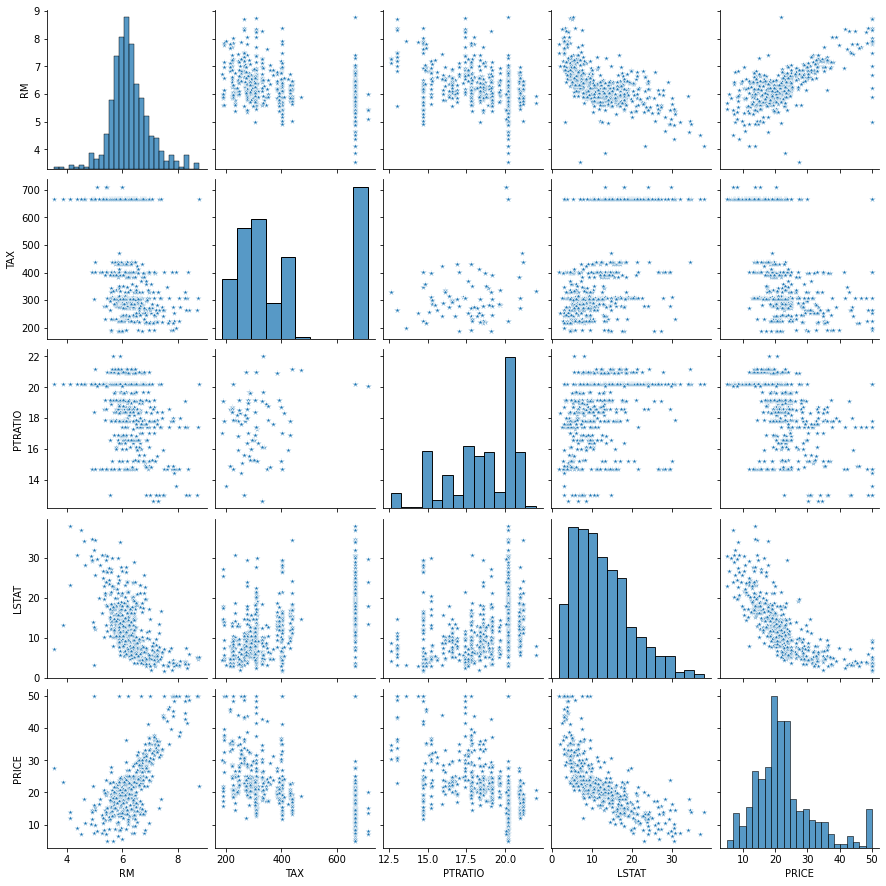

In [12]:
sns.pairplot(new_df,kind = 'scatter',markers="*",palette="viridis")
plt.show()

### Few Observations- 
1. RM is quuite normally distributed and it has clear linear relationship with the PRICE 
2. LSTAT is skewed to the right and also linear (negative) relationship with the PRICE

In [13]:
#description about data
desc = new_df.describe().round(2)
desc.style.background_gradient()

RM     TAX  PTRATIO   LSTAT   PRICE
count  506.00  506.00   506.00  506.00  506.00
mean     6.28  408.24    18.46   12.65   22.53
std      0.70  168.54     2.16    7.14    9.20
min      3.56  187.00    12.60    1.73    5.00
25%      5.89  279.00    17.40    6.95   17.02
50%      6.21  330.00    19.05   11.36   21.20
75%      6.62  666.00    20.20   16.96   25.00
max      8.78  711.00    22.00   37.97   50.00

## Now we are going to handle MISSING VALUES 

In [14]:
import plotly.express as px

fig = px.histogram(new_df, x='PRICE',width=600,height=400)
fig.show()
  

In [15]:
fig = px.box(new_df, x='PRICE',width=600,height=400)
fig.update_traces(quartilemethod="linear")
fig.show()

#### Let's observe data points which lies outside wiskers.

* Q3 + 1.5 IQR < Potential Outliers < Q1 - 1.5 IQR

- Q3 -> Quartile 3, Under which 75% of data lies
- Q1 -> Quartile 1, Under which 25% of data lies
- IQR -> Inter-Quartile Range, Q3 - Q1

In [16]:
PRICE_Q3 = desc['PRICE']['75%'] 
print(blue(PRICE_Q3))
 
PRICE_Q1 = desc['PRICE']['25%']
print(blue(PRICE_Q1))

PRICE_IQR = PRICE_Q3 - PRICE_Q1   
print(blue(PRICE_IQR))

PRICE_UV = PRICE_Q3 + 1.5 * PRICE_IQR
print(blue(PRICE_UV))

PRICE_LV = PRICE_Q1 - 1.5 * PRICE_IQR 
print(blue(PRICE_LV))

 

25.0
17.02
7.98
36.97
5.049999999999999


In [17]:
PRICE_df1 = new_df[new_df['PRICE']<PRICE_LV]
PRICE_df1.style.background_gradient()

- In the above data, For 5 rooms house, tax is 666. This TAX amount is relatively high
- Even the PRICE is low, LSTAT is high
 

In [18]:
PRICE_df2 = new_df[new_df['PRICE']>PRICE_UV].sort_values(by=['PRICE','RM'])
PRICE_df2.style.background_gradient()

- For house prices = 50, it is observed that number of Room ranges from 5 to to 9 (approx.) which is quite unusual.
- For these houses TAX ranges from low to high.
- Let's drop entries where PRICE is 50

In [19]:
new_df1 = new_df[~(new_df['PRICE']==50)]
print(new_df1.shape)

(490, 5)


### Let's check TAX column

In [20]:
fig = px.histogram(new_df1, x='TAX',width=600,height=400)
fig.show()

- TAX is not  normally distributed, 
- There are around 127 entries where TAX value ranges between 650 to 699.This is also the maximum count

In [22]:
fig = px.box(new_df1, x='TAX',width=600,height=400)
fig.update_traces(quartilemethod="linear")
fig.show()

- From the above boxplot, we dont see any outliers, however from the histogram, it is clear that there are extreme tax values as well

In [23]:
# Let's find out number of houses with TAX > 600
temp_df = new_df1[new_df['TAX']>600].sort_values(by=['RM','PRICE'])
temp_df.shape

(132, 5)

In [24]:
temp_df.style.background_gradient()

In [26]:
temp_df.describe().style.background_gradient()

- RM for these entries are from 4 to 9 (approx)
- PTARTIO is same for all
- LSTAT is between 5 to 37 
- PRICE ranges between 5 to 29.8

These values dont look normal,let's impute TAX values

In [27]:
TAX_10 = new_df1[(new_df1['TAX']<600) & (new_df1['LSTAT']>=0) & (new_df1['LSTAT']<10)]['TAX'].mean()
TAX_20 = new_df1[(new_df1['TAX']<600) & (new_df1['LSTAT']>=10) & (new_df1['LSTAT']<20)]['TAX'].mean()
TAX_30 = new_df1[(new_df1['TAX']<600) & (new_df1['LSTAT']>=20) & (new_df1['LSTAT']<30)]['TAX'].mean()
TAX_40 = new_df1[(new_df1['TAX']<600) & (new_df1['LSTAT']>=30)]['TAX'].mean()

indexes = list(new_df1.index)
for i in indexes:
    if new_df1['TAX'][i] > 600:
        if (0 <= new_df1['LSTAT'][i] < 10):
            new_df1.at[i,'TAX'] = TAX_10
        elif (10 <= new_df1['LSTAT'][i] < 20):
            new_df1.at[i,'TAX'] = TAX_20
        elif (20 <= new_df1['LSTAT'][i] < 30):
            new_df1.at[i,'TAX'] = TAX_30
        elif (new_df1['LSTAT'][i] >30):
            new_df1.at[i,'TAX'] = TAX_40



In [28]:
#This show all those extreme TAX values are replaced successfully
new_df1[new_df1['TAX']>600]['TAX'].count()

0

In [31]:
fig = px.histogram(new_df1, x='TAX',width=600,height=400,title=" TAX Distribution after imputation")
fig.show()

### PTRATIO

In [30]:
fig = px.histogram(new_df1, x='PTRATIO',width=600,height=400,title='PTATIO Distribution')
fig.show()

- PTRATIO is also not normally distributed
- Let's check the boxplot for outliers

In [32]:
fig = px.box(new_df1, x='PTRATIO',width=600,height=400)
fig.update_traces(quartilemethod="linear")
fig.show()

In [33]:
PTRATIO_df = new_df1[new_df1['PTRATIO']<14].sort_values(by=['LSTAT','PRICE'])
PTRATIO_df.style.background_gradient()

- PTRATIO for all above data points 13
- RM and PRICE is increasing simultaneously, as RM and PRICE are positively correlated, which is fine.
- As LSTAT increases PRICE decreases, which follows negative correlation.

### LSTAT

In [34]:
fig = px.histogram(new_df1, x='LSTAT',width=600,height=400,title='LSTAT Distribution')
fig.show()

LSTAT is also not normally distributed and it is right skewed

In [35]:
fig = px.box(new_df1, x='LSTAT',width=600,height=400,title='LSTAT Box Plot') 
fig.update_traces(quartilemethod="linear")
fig.show()

In [36]:
LSTAT_Q3 = desc['LSTAT']['75%'] 
print(blue(LSTAT_Q3))
 
LSTAT_Q1 = desc['LSTAT']['25%']
print(blue(LSTAT_Q1))

LSTAT_IQR = LSTAT_Q3 - LSTAT_Q1   
print(blue(LSTAT_IQR))

LSTAT_UV = LSTAT_Q3 + 1.5 * LSTAT_IQR
print(blue(LSTAT_UV))

LSTAT_LV = LSTAT_Q1 - 1.5 * LSTAT_IQR 
print(blue(LSTAT_LV))

16.96
6.95
10.010000000000002
31.975
-8.065000000000001


In [37]:
LSTAT_df = new_df1[new_df1['LSTAT']>LSTAT_UV].sort_values(by='LSTAT')
LSTAT_df.style.background_gradient()

- From above table, LSAT value for these 7 houses is high resulting in low PRICE, which follows the negative correaltion and is True.
- RM is low and TAX is little higher which means low PRICE and which is True.

### RM

In [38]:
fig = px.histogram(new_df1, x='RM',width=600,height=400,title='RM Distribution')
fig.show()

RM looks normally distributed

In [39]:
RM_Q3 = desc['RM']['75%'] 
print(blue(RM_Q3))
 
RM_Q1 = desc['RM']['25%']
print(blue(RM_Q1))

RM_IQR = RM_Q3 - RM_Q1   
print(blue(RM_IQR))

RM_UV = RM_Q3 + 1.5 * RM_IQR
print(blue(RM_UV))

RM_LV = RM_Q1 - 1.5 * RM_IQR 
print(blue(RM_LV))

 

6.62
5.89
0.7300000000000004
7.715000000000001
4.794999999999999


In [40]:
RM_df = new_df1[new_df1['RM']<RM_LV].sort_values(by=['RM','PRICE'])
RM_df.style.background_gradient()

- We will delete rows 365 and 367, beacause though RM value is low, PRICE is high for these two entries.
- This may affect the prediction of our model

In [41]:
new_df2 = new_df1.drop(axis=0,index=[365,367])
new_df2[new_df2['RM']>RM_UV].sort_values(by=['RM','PRICE'])

RM         TAX  PTRATIO  LSTAT  PRICE
180  7.765  193.000000     17.8   7.56   39.8
98   7.820  276.000000     18.0   3.57   43.8
280  7.820  216.000000     14.9   3.76   45.4
203  7.853  224.000000     14.7   3.81   48.5
226  8.040  307.000000     17.4   3.13   37.6
97   8.069  276.000000     18.0   4.21   38.7
233  8.247  307.000000     17.4   3.95   48.3
253  8.259  330.000000     19.1   3.54   42.8
224  8.266  307.000000     17.4   4.14   44.8
232  8.337  307.000000     17.4   2.47   41.7
262  8.398  264.000000     13.0   5.91   48.8
364  8.780  293.914141     20.2   5.29   21.9

In [43]:
#We will also delete row 364, as RM is high but the PRICE is low 
new_df2 = new_df2.drop(axis=0,index=[364])

### Scaling and Splitting the data

In [44]:
 ### We will consider 4 features
    
X = new_df2[['RM','TAX','PTRATIO','LSTAT']]
y = new_df2['PRICE']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Let's split the data
    
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.3,random_state = 42)

print("Shape of X train:",X_train.shape)
print("Shape of Y Train:", X_test.shape)
 

Shape of X train: (340, 4)
Shape of Y Train: (147, 4)


In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [46]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

#### Let's train the model with best params

             0     1
0    22.938999  22.8
1    32.717291  29.6
2    16.508878  12.7
3    20.810648  20.3
4    16.994634  14.2
..         ...   ...
142  20.526251  21.2
143  21.386067  19.3
144  20.184328  23.1
145  17.938957  20.1
146  21.642503  25.0

[147 rows x 2 columns]
-------------------------------
Mean_Absolute_Error :  2.1307418333212547
Mean_Squared_Error :  7.687522017095078
Root_Mean_Squared_Error :  2.7726380970287265
R2 score is :  0.8849637231497172
-------------------------------


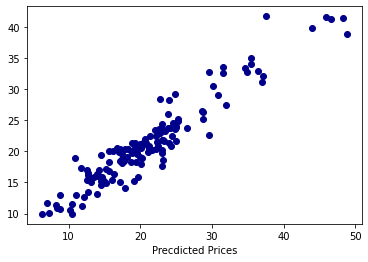

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

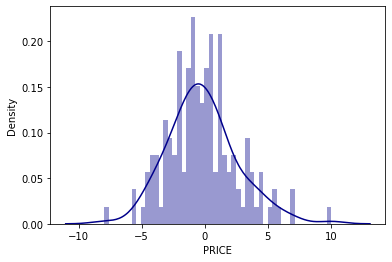

In [48]:
model = RandomForestRegressor(n_estimators=1600,min_samples_split= 2,min_samples_leaf= 4,max_features='sqrt',max_depth=80,bootstrap= True)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

model_df = pd.DataFrame(data = [y_pred,y_test])
print(model_df.T)

print("-------------------------------")
print('Mean_Absolute_Error : ' , metrics.mean_absolute_error(y_test,y_pred))
print('Mean_Squared_Error : ' , metrics.mean_squared_error(y_test,y_pred))
print('Root_Mean_Squared_Error : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 score is : ', r2_score(y_test,y_pred))
print("-------------------------------")
    
    ## Let's plot the scaterplot of Precicted and Actual values
plt.scatter(y_test,y_pred,color= 'darkblue')
plt.xlabel("Actual Prices")
plt.xlabel("Precdicted Prices")
plt.show()

sns.distplot((y_test-y_pred),bins=50,color= 'darkblue')
 

Variance score: 0.8849637231497172


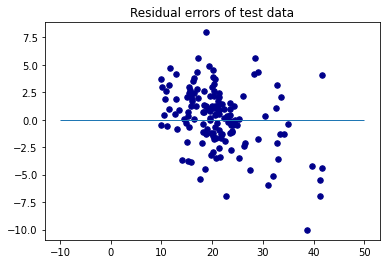

In [49]:
plt.scatter(model.predict(X_test),model.predict(X_test) - y_test,s=30,color='darkblue')
plt.xlabel('')
plt.title("Residual errors of test data")
plt.hlines(0,xmin=-10,xmax=50,lw=1)
       
# The closer to 1,accurate is the prediction

print("Variance score: {}".format(model.score(X_test,y_test)))


In [50]:
y_pred = model.predict(X_test)
y_pred_data = pd.DataFrame({'Actual Prices':y_test,'Predicted Prices':y_pred,'Difference':y_test-y_pred})
y_pred_data[0:30]

Actual Prices  Predicted Prices  Difference
72            22.8         22.938999   -0.138999
252           29.6         32.717291   -3.117291
456           12.7         16.508878   -3.808878
79            20.3         20.810648   -0.510648
421           14.2         16.994634   -2.794634
497           18.3         20.420766   -2.120766
206           24.4         22.464355    1.935645
63            25.0         24.603850    0.396150
84            23.9         23.786388    0.113612
318           23.1         21.828270    1.271730
9             18.9         19.682414   -0.782414
68            17.4         19.517612   -2.117612
468           19.1         15.307495    3.792505
394           12.7         16.205462   -3.505462
282           46.0         41.601266    4.398734
384            8.8         10.714210   -1.914210
453           17.8         20.422449   -2.622449
30            12.7         13.540038   -0.840038
153           19.4         18.298031    1.101969
461           17.7         18.411564   -0.711564
259           30.1         30.426044   -0.326044
233           48.3         41.319010    6.980990
93            25.0         23.928065    1.071935
322           20.4         21.299709   -0.899709
460           16.4         16.421127   -0.021127
155           15.6         20.128118   -4.528118
500           16.8         20.520609   -3.720609
82            24.8         23.598951    1.201049
78            21.2         20.882020    0.317980
489            7.0         11.686517   -4.686517